In [1]:
import pandas as pd
import operator
import osmnx as ox, networkx as nx, geopandas as gpd, matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon, LineString
from descartes import PolygonPatch
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
from tqdm import tqdm_notebook ##진행바 표시
from threading import Thread  ##쓰레드
import warnings
from time import sleep
import time #시간지연

warnings.filterwarnings(action="ignore")
ox.config(use_cache=True, log_console=True)
ox.__version__

# www.openstreetmap.org에서 검색 결과가 city-state-country 단위로 나와야 함 - '마포구, 서울, 대한민국'
G = ox.graph_from_place(['대구, 대한민국'],  network_type='walk', simplify=True)

#fig, ax = ox.plot_graph(G, figsize=(27,27), node_size=0, edge_linewidth=0.5, edge_color='#a7ccc0')


In [2]:
pd.set_option('precision', 20)

In [3]:
data = pd.read_csv("./나드리콜_버스.csv",encoding="cp949") 

In [5]:
data['distanc'] = 0

data2=data[data['경도'].notnull()]



for i in tqdm_notebook(data2.index):
    orig=data2[['CallX', 'CallY']].values[i]
    dest=data2[['경도', '위도']].values[i]
    
    orig_node = ox.nearest_nodes(G, orig[0],orig[1])
    dest_node = ox.nearest_nodes(G, dest[0],dest[1])
    len_route = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
    data['distanc'][i]=len_route

KeyboardInterrupt: 

In [11]:
i-1

11207

In [17]:
data_0_11207=data[data.index <= (i-1)]

In [31]:
data.shape

(2659062, 14)

In [33]:
data_0_11207=data[data.index <= (i-1)]
data_11208_200000=data[(data.index > (i-1))&(data.index <= 200000)]
data_200001_400000=data[(data.index > 200001)&(data.index <= 400000)]
data_400001_600000=data[(data.index > 400001)&(data.index <= 600000)]
data_600001_800000=data[(data.index > 600001)&(data.index <= 800000)]
data_800001_1000000=data[(data.index > 800001)&(data.index <= 1000000)]
data_1000001_1200000=data[(data.index > 1000001)&(data.index <= 1200000)]
data_1200001_1400000=data[(data.index > 1200001)&(data.index <= 1400000)]
data_1400001_1600000=data[(data.index > 1400001)&(data.index <= 1600000)]
data_1600001_1800000=data[(data.index > 1600001)&(data.index <= 1800000)]
data_1800001_2000000=data[(data.index > 1800001)&(data.index <= 2000000)]
data_2000001_2200000=data[(data.index > 2000001)&(data.index <= 2200000)]
data_2200001_2400000=data[(data.index > 2200001)&(data.index <= 2400000)]
data_2400001_=data[(data.index > 2400001)]


In [34]:
data_0_11207.to_csv("data_0_11207.csv",encoding='cp949') #완료
data_11208_200000.to_csv("data_11208_200000.csv",encoding='cp949')
data_200001_400000.to_csv("data_200001_400000.csv",encoding='cp949')
data_400001_600000.to_csv("data_400001_600000.csv",encoding='cp949')
data_600001_800000.to_csv("data_600001_800000.csv",encoding='cp949')
data_800001_1000000.to_csv("data_800001_1000000.csv",encoding='cp949')
data_1000001_1200000.to_csv("data_1000001_1200000.csv",encoding='cp949')
data_1200001_1400000.to_csv("data_1200001_1400000.csv",encoding='cp949')
data_1400001_1600000.to_csv("data_1400001_1600000.csv",encoding='cp949')
data_1600001_1800000.to_csv("data_1600001_1800000.csv",encoding='cp949')
data_1800001_2000000.to_csv("data_1800001_2000000.csv",encoding='cp949')
data_2000001_2200000.to_csv("data_2000001_2200000.csv",encoding='cp949')
data_2200001_2400000.to_csv("data_2200001_2400000.csv",encoding='cp949')
data_2400001_.to_csv("data_2400001_.csv",encoding='cp949')


In [178]:
data_0_11207.to_csv("나드리콜_버스_거리data_0_11207.csv",encoding='cp949') #완료

In [73]:
data2.index

Int64Index([ 11208,  11209,  11210,  11211,  11212,  11213,  11214,  11215,
             11216,  11217,
            ...
            199991, 199992, 199993, 199994, 199995, 199996, 199997, 199998,
            199999, 200000],
           dtype='int64', length=188793)

data2['CallX'][11208],data2['CallY'][11208] = data2[['CallX', 'CallY']].values[0]

data2['CallX'][(11208+11208)],data2['CallY'][(11208+11208)] = data2[['CallX', 'CallY']].values[11208]


In [114]:
i

188793

In [156]:
data2['distanc_2']=0

for i in tqdm_notebook(range(0,177585)):
    data2['distanc_2'].iloc[(i+11208)] =  data2['distanc'].iloc[i]

IndexError: iloc cannot enlarge its target object

In [180]:
data3=data2.drop(["distanc"],axis=1)

In [181]:
data3.rename(columns = {'distanc_2' : 'distanc'}, inplace = True)


In [184]:
data3[data3.distanc>0].to_csv("나드리콜_버스_거리data_11208_200000.csv",encoding="cp949")

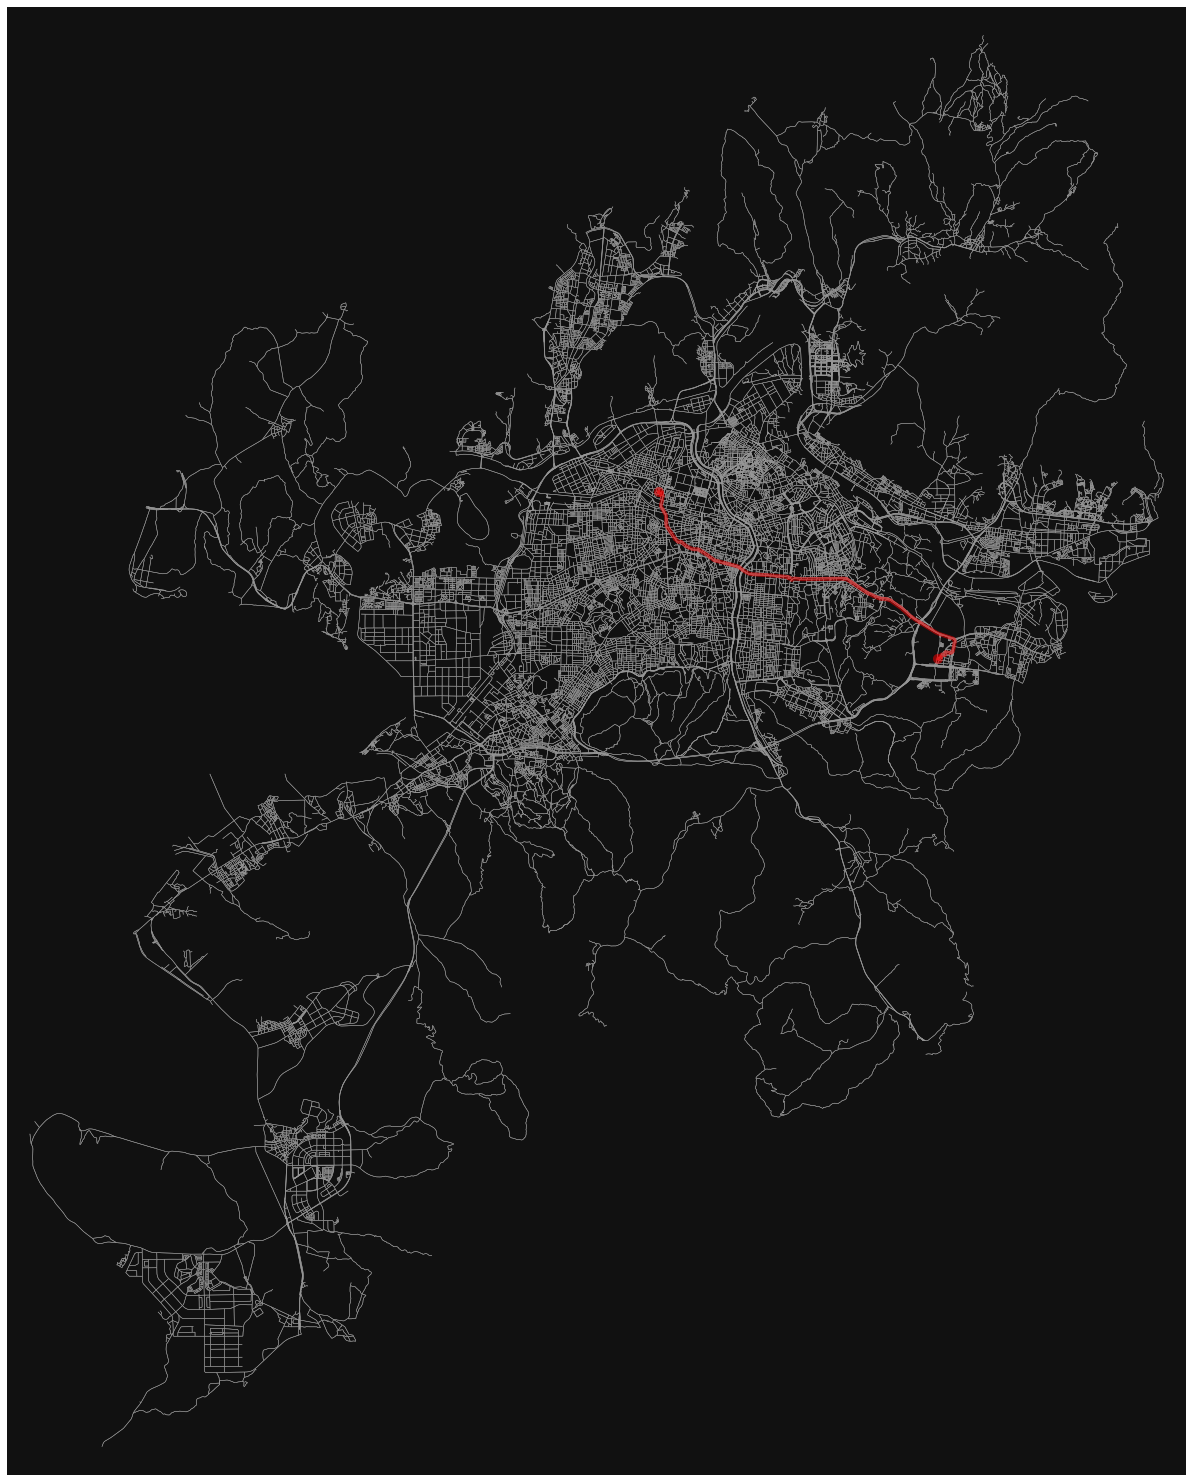

12764.249000000002 m
Wall time: 11.6 s


In [185]:
%%time




route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0, edge_linewidth=0.5, figsize=(27,27))

len_route = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
print(len_route, "m")